# Hypothesis Testing on Beer Data
This notebook explores different facets of beer, including brewing location, bitterness, and alcohol content. We use this data to generate and test hypotheses.

## BreweryDB Data
### Loading the dataset
The data for this first test wass pulled from [BreweryDB](https://www.brewerydb.com/developers/apps) by API. The data was saved as a CSV.

In [1]:
# Data analysis packages:
import pandas as pd
import numpy as np

# Visualization packages:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload

## Loading the dataset
beers = pd.read_csv('data/dirty_data.csv')

### Understanding the data

In order to define the hypotheses, we first need to know what information is available in the dataset.

In [2]:
## Printing the number of samples in the dataset:
print('This dataset has {0} samples.'.format(len(beers)), 'and {} columns'.format(len(beers.columns)-1))

## Show first five rows:
beers.head()

This dataset has 508400 samples. and 20 columns


,Unnamed: 0,id,name,name_display,abv,gravity,ibu,organic,retired,style_name,...,updated,ibu_min,ibu_max,abv_min,abv_max,srm_min,srm_max,fg_min,fg_max,og_min
0,0,c4f2KE,'Murican Pilsner,'Murican Pilsner,5.5,NaN,NaN,N,N,American-Style Pilsener,...,2018-11-02 02:15:14,25.0,40.0,5.0,6.0,3.0,6.0,1.012,1.018,1.045
1,1,zTTWa2,11.5° PLATO,11.5° PLATO,4.5,1.046,35.0,N,N,Session India Pale Ale,...,2018-11-02 02:15:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,zfP2fK,12th Of Never,12th Of Never,5.5,1.050,45.0,N,N,American-Style Pale Ale,...,2018-11-02 02:15:14,30.0,42.0,4.5,5.6,6.0,14.0,1.008,1.014,1.044
3,3,xwYSL2,15th Anniversary Ale,15th Anniversary Ale,NaN,NaN,NaN,N,N,Extra Special Bitter,...,2018-11-02 02:15:14,30.0,45.0,4.8,5.8,8.0,14.0,1.010,1.016,1.046
4,4,UJGpVS,16 So Fine Red Wheat Wine,16 So Fine Red Wheat Wine,11.0,NaN,NaN,N,N,American-Style Wheat Wine Ale,...,2018-11-02 02:15:14,45.0,85.0,8.4,12.0,8.0,15.0,1.024,1.032,1.088


In [48]:
print(beers.name.value_counts().head())

20th Street Ale Crystal    10168
420 Extra Pale Ale         10168
2017 Beer Camp             10168
A Beer Named Sue           10168
Alpha Dog Imperial IPA     10168
Name: name, dtype: int64


## New Beer Dataset
The dataset that we pulled using the BreweryDB API was sandbox data and contained dummy information that was not appropriate for analysis.

We chose a new dataset that covered the same information.

### Loading the Dataset and Understanding the Data

In [3]:
brewery = pd.read_csv('data/beer_and_brewery.csv')
brewery.head()

,Unnamed: 0,beer_id,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state
0,0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


## Hypothesis 1: ABV/IBU of beers brewed in Colorado and beers brewed in California
In this test, we compare beers brewed in two states to see if there is a significant difference between their ABVs.

According to [TheDenverChannel](https://www.thedenverchannel.com/money/consumer/colorado-grocers-can-offer-full-strength-beer-on-jan-1), prior to 2019, beer sold at Colorado grocery and convenience stores ws limited to 3.2% alcohol by weight, or 4% ABV. To find beer with higher alcohol content — typically known as full-strength beer — you had to shop at liquor stores.

You can view other laws by state [here](https://www.legalbeer.com/liquor-laws-by-state).

In [4]:
# Hypothesis question: what is the difference in ABV between CO and CA
CO_brewery = brewery[brewery.state == 'CO']['abv']
CA_brewery = brewery[brewery.state == 'CA']['abv']
CO_brewery = CO_brewery[~np.isnan(CO_brewery)]
CA_brewery = CA_brewery[~np.isnan(CA_brewery)]
print('Sample Alcohol by Volume (ABV) mean in Colorado', round(CO_brewery.mean(), 3))
print('Sample Alcohol by Volume (ABV) variance in Colorado', round(CO_brewery.var(), 5))
print("---------------------------------")
print('Sample Alcohol by Volume (ABV) mean in California', round(CA_brewery.mean(), 3))
print('Sample Alcohol by Volume (ABV) variance in Colorado', round(CA_brewery.var(), 5))

Sample Alcohol by Volume (ABV) mean in Colorado 0.063
Sample Alcohol by Volume (ABV) variance in Colorado 0.00021
---------------------------------
Sample Alcohol by Volume (ABV) mean in California 0.061
Sample Alcohol by Volume (ABV) variance in Colorado 0.00023


### 1.1. Set Null Hypotheses

The null hypothesis is there is no difference in Alcohol By Volume between beers brewed in Colorado and beers brewed in California.

>**$H_{0}$: The mean ABV difference between Colorado beers and California beers is zero. i.e. $H_{0} = H_{1}$**

### 1.2. Set Alternative Hypothesis

>**$H_{1}$ (2-tailed): The mean difference between Colorado and California beers is different.**

### 1.3. Choose the Significance Level
The significance level ($\alpha$) is the probability of rejecting the null hypothesis when it is actually true. The general significance level of 0.05 or 5% risk is used for this hypothesis testing.

### 1.4. Choose A Test
The Central Limit Theory states that as the number of samples increases, the distribution of sample means follows a normal distribution.

This allows us to perform a two-sample t-test.



### 1.5. Calculate Test Statistic
We know that the variance is equal in these samples.
we can calculate the two-sample t-statistic like so:

$$\large t = \frac{\bar{x}_{1} - \bar{x}_{2}}{\sqrt{s^{2}_{p} (\frac{1}{n_{1}} + \frac{1}{n_{2}}) }    }  $$

Where $s^{2}_{p}$ is the pooled sample variance, calculated as:

$$\large s^{2}_{p}  = \frac{(n_{1} -1)s^{2}_{1} +  (n_{2} -1)s^{2}_{2}}{n_{1} + n_{2} - 2}  $$

Where $s^{2}_{1}$ and $s^{2}_{2}$ are the variances for each sample given by the formula 
$$ \large s^{2} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}{n-1} $$

In [5]:
import test_moduls  as test
t_stat = test.twosample_tstatistic(CO_brewery, CA_brewery)

Null hypothesis is True with t-statistic =  1.5843 , critical t-value =  1.9655 and p-value =  0.0569
The groups contain 250 and  182 observations. Means are:  0.0634 and 0.0611 respectivelly


### 1.6. Interpret the Result

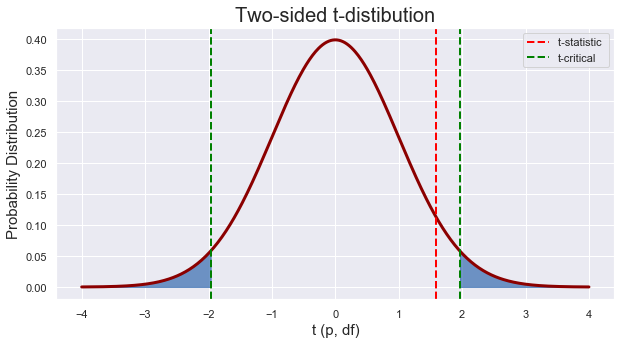

In [6]:
import visualization
import numpy as np
visualization.visualize_t(t_stat, len(CO_brewery), len(CA_brewery))

## Welch's t-test
Welch's t-test is most common hypothesis test used in a two-sample test to infer the two populations have equal means. Welch's t-test is more reliable when the two samples have unequal variances and/or unequal sample sizes.

Here we use the test to examine IBU of the same subsets of beers-- those brewed in Colorado and California.

In [7]:
CO_ibu = brewery[brewery.state == 'CO']['ibu']
CA_ibu = brewery[brewery.state == 'CA']['ibu']
CO_ibu = CO_ibu[~np.isnan(CO_ibu)]
CA_ibu = CA_ibu[~np.isnan(CA_ibu)]
print('Sample Alcohol by Volume (ABV) mean in Colorado:', round(CO_ibu.mean(), 3))
print('Sample Alcohol by Volume (ABV) variance in Colorado: ', round(CO_ibu.var(), 5))
print('Sample size is: ', CO_ibu.size)
print("---------------------------------")
print('Sample Alcohol by Volume (ABV) mean in California: ', round(CA_ibu.mean(), 3))
print('Sample Alcohol by Volume (ABV) variance in Colorado: ', round(CA_ibu.var(), 5))
print('Sample size is', CA_ibu.size)

Sample Alcohol by Volume (ABV) mean in Colorado: 47.432
Sample Alcohol by Volume (ABV) variance in Colorado:  679.21252
Sample size is:  146
---------------------------------
Sample Alcohol by Volume (ABV) mean in California:  46.281
Sample Alcohol by Volume (ABV) variance in Colorado:  752.80077
Sample size is 135


There is clear unequality in variance and sample sizes between our two population groups, so Welchs test is a better candidate than two-sample t-test

Welch test degrees of freedom and t-statistic is calcualted using the following formaula. 
$$\text{df}  = \frac{\big(\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}\big)^{2}}{\frac{1}{n_{1}-1}\big(\frac{s_{1}^{2}}{n_{1}}\big)^{2} + \frac{1}{n_{2}-1}\big(\frac{s_{2}^{2}}{n_{2}}\big)^{2}}$$
Then T-statistics also known as Welch's t-test is given by: 

$$   t = \frac{(\bar{x}_{1} - \bar{x}_{2}) - D_{0}}{\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}} = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{se_1^2+se_2^2}}$$

In [8]:
# import test_moduls that contain function helpful to make weltch test
import test_moduls as test
welch_t = test.welch_t(CO_ibu, CA_ibu)
print("Welch's t-statistic is: ", round(welch_t,4))
welch_df = test.welch_df(CO_ibu, CA_ibu)
print("Welch's degrees of fredoom (df):", round(welch_df,2))

# converting this to p_value 
p_welch = test.p_value_welch_ttest(CO_ibu, CA_ibu)

Welch's t-statistic is:  0.3596
Welch's degrees of fredoom (df): 274.37
We fail to reject the Null hypothesis with t-value =  0.3596 , critical t-value =  1.6504 , and p-value =  0.3597


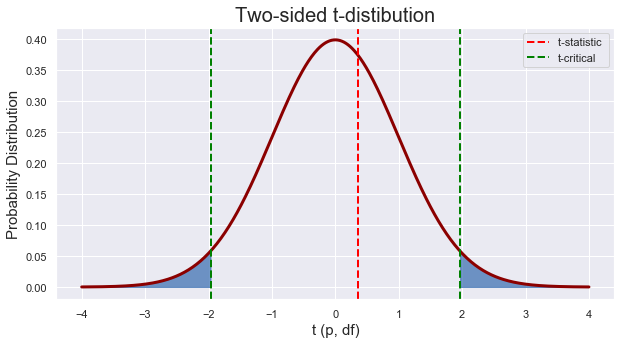

In [9]:
visualization.visualize_t(welch_t, len(CO_ibu), len(CA_ibu))

## Hypothesis 2: IBU of Beers Brewed on West Coast and East Coast
Here we use a function that we created called coast_list() to identify each brewery as East Coast or West Coast. Breweries that are neither are ignored. We then use groupby() to take a quick look at summary statistics.

In [10]:
import function as f
beer_df_by_coast = f.coast_list(brewery)
beer_df_by_coast.head()

,beer_name,brewery_name,ibu,state,region
21,Lower De Boom,21st Amendment Brewery,92.0,CA,wc
22,Fireside Chat,21st Amendment Brewery,45.0,CA,wc
24,Bitter American,21st Amendment Brewery,42.0,CA,wc
25,Hell or High Watermelon Wheat (2009),21st Amendment Brewery,17.0,CA,wc
26,Hell or High Watermelon Wheat (2009),21st Amendment Brewery,17.0,CA,wc


In [11]:
groupby_coast = beer_df_by_coast.groupby(['region'])
groupby_coast.describe()

ibu                                                     
        count       mean        std  min    25%   50%   75%    max
region                                                            
ec      333.0  42.687688  25.884563  5.0  22.00  35.0  60.0  135.0
wc      428.0  46.665888  26.217038  4.0  23.75  40.0  68.0  138.0

### 2.1. Set Null Hypotheses

The null hypothesis is there is no difference in IBU between beers brewed on the East Coast and beers brewed on the West Coast.

>**$H_{0}$: The mean IBU difference between East Coast beers and West Coast beers is zero. i.e. $H_{0} = H_{1}$**

### 2.2. Set Alternate Hypothesis

>**$H_{1}$ (2-tailed): The mean difference between East Coast and West Coast beers is different.**

### 2.3. Choose the Significance Level
The significance level ($\alpha$) is the probability of rejecting the null hypothesis when it is actually true. The general significance level of 0.05 or 5% risk is used for this hypothesis testing.

### 2.4. Choose A Test
We explore our data to determine which statistical test should be conducted.

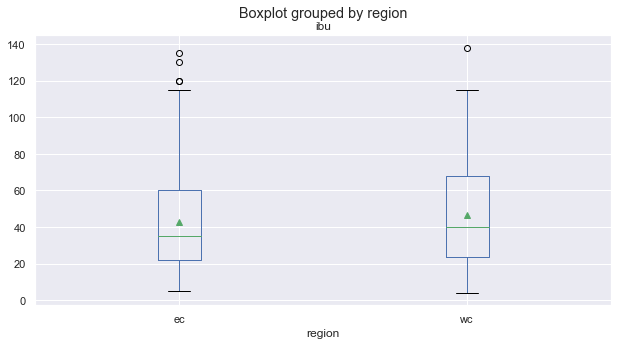

In [39]:
beer_df_by_coast.boxplot(column='ibu',by='region', figsize=(10,5), showmeans=True);

In [36]:
#Remove outliers
beer_clean_df = beer_df_by_coast[beer_df_by_coast.ibu < 120]

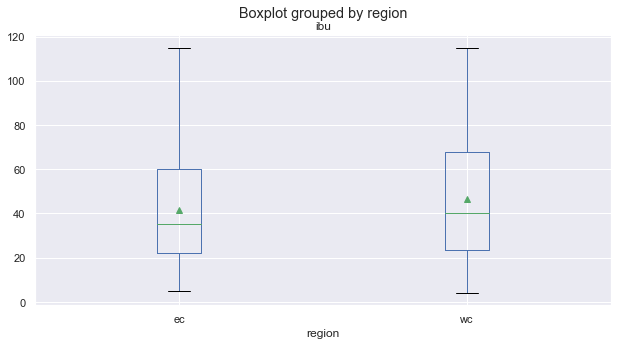

In [38]:
beer_clean_df.boxplot(column='ibu',by='region', figsize=(10,5), showmeans=True);

In [40]:
ec_beers = beer_clean_df.loc[beer_clean_df['region'] == 'ec']
wc_beers = beer_clean_df.loc[beer_clean_df['region'] == 'wc']
wc_ibu = wc_beers['ibu']
ec_ibu = ec_beers['ibu']
wc_mean_ibu = wc_beers['ibu'].mean()
ec_mean_ibu = ec_beers['ibu'].mean()
wc_std_ibu = wc_beers['ibu'].std()
ec_std_ibu = ec_beers['ibu'].std()
wc_count = len(wc_beers)
ec_count = len(ec_beers)

In [41]:
# get the East Coast and West Coast Beers
ec_beers = beer_df_by_coast.loc[beer_df_by_coast['region'] == 'ec']
wc_beers = beer_df_by_coast.loc[beer_df_by_coast['region'] == 'wc']

## explore the mean, variance/standard divation and sample size 
print('\n' +'IBU matrix for East Coast Beers')
print('----------------')
print('East Coast mean:',round(ec_beers['ibu'].mean(),3))
print('East Coast standard deviation:', (ec_beers['ibu'].std()))
print('East Coast size:', len(ec_beers))
print('\n' +'IBU matrix for West Coast Beers')
print('----------------')
print('West Coast mean:', round(wc_beers['ibu'].mean(),3))
print('West Coast standard deviation:', round(wc_beers['ibu'].std(),3))
print('West Coast size:', len(wc_beers))


IBU matrix for East Coast Beers
----------------
East Coast mean: 42.688
East Coast standard deviation: 25.884562985733567
East Coast size: 333

IBU matrix for West Coast Beers
----------------
West Coast mean: 46.666
West Coast standard deviation: 26.217
West Coast size: 428



### 2.5 Calculate the Test Statistic
We know that the variance is equal in these samples.
we can calculate the two-sample t-statistic like so:

$$\large t = \frac{\bar{x}_{1} - \bar{x}_{2}}{\sqrt{s^{2}_{p} (\frac{1}{n_{1}} + \frac{1}{n_{2}}) }    }  $$

Where $s^{2}_{p}$ is the pooled sample variance, calculated as:

$$\large s^{2}_{p}  = \frac{(n_{1} -1)s^{2}_{1} +  (n_{2} -1)s^{2}_{2}}{n_{1} + n_{2} - 2}  $$

Where $s^{2}_{1}$ and $s^{2}_{2}$ are the variances for each sample given by the formula 
$$ \large s^{2} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}{n-1} $$

In [42]:
t_stat = test.twosample_tstatistic(wc_ibu, ec_ibu)

Null hypohesis rejected. Results are statistically significant
         with t-statistic =  2.585 , critical t-value =  1.9631 and p-value =  0.005
The groups contain 427 and  329 observations. Means are:  46.452 and 41.6717 respectivelly


### 2.6. Interpret the Result

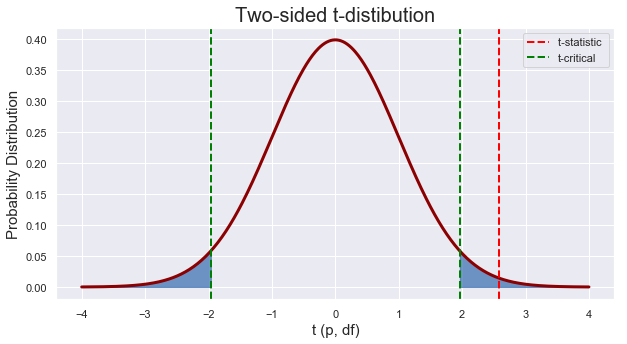

In [43]:
visualization.visualize_t(t_stat, wc_count, ec_count, alpha=.05)

## Welch's t-test
Welch's t-test is the most common hypothesis test used in a two-sample test to infer that two populations have equal means. Welch's test is more reliable when the two samlples have unequal variances and/or unequal sample sizes.

Welch test degrees of freedom and t-statistic is calcualted using the following formaula. 
$$\text{df}  = \frac{\big(\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}\big)^{2}}{\frac{1}{n_{1}-1}\big(\frac{s_{1}^{2}}{n_{1}}\big)^{2} + \frac{1}{n_{2}-1}\big(\frac{s_{2}^{2}}{n_{2}}\big)^{2}}$$
Then T-statistics also known as Welch's t-test is given by: 

$$   t = \frac{(\bar{x}_{1} - \bar{x}_{2}) - D_{0}}{\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}} = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{se_1^2+se_2^2}}$$

In [44]:
welch_t = test.welch_t(wc_ibu, ec_ibu)
print("Welch's t-statistic is: ", round(welch_t,4))
welch_df = test.welch_df(wc_ibu, ec_ibu)
print("Welch's degrees of fredoom (df):", round(welch_df,4))

# converting this to p_value 
p_welch = test.p_value_welch_ttest(wc_ibu, ec_ibu, two_sided=True)

Welch's t-statistic is:  2.6058
Welch's degrees of fredoom (df): 724.9698
Null hypohesis rejected. Results are statistically significant
         with t-value =  2.6058 , critical t-value =  1.647 , and p-value =  0.0047


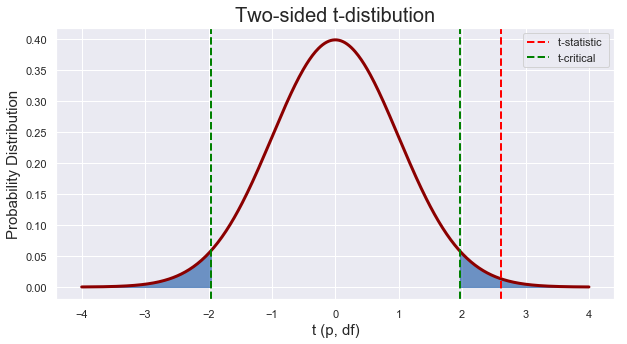

In [49]:
visualization.visualize_t(welch_t, wc_count, ec_count, alpha=.05)

## 2.7. Comparing Two-Sided t-test to Welch's t-test

Having conducted two different tests on the same information, we can compare their p- and t-values.

The two-sided t-test returned: ***t-value =  2.581 and p-value =  0.005***

The Welch t-test returned: ***t-value =  2.606 , and p-value =  0.0047***

We see that the outputs are very similar.